# Explore (Exploratory Data Analysis or EDA) 

What is it?

- We explore the interactions of the attributes and target variable
- Pipeline: Plan - Acquire - Prepare - **Explore** - Model - Deliver

What do we care?

- Learn the vast majority of our takeaways and interesting stories from the data
- This section of the pipeline allows us to provide business insights
- This section determine which features to send into our model 

### Overall Process

Acquire
- get the data into a dataframe 

Prepare
- perform univariate stats
- clean up your data
- encode your data
- split your data

Explore
- work only with train data!!!!!!
- explore features
    - bivariate stats
    - multivariate stats
- final takeaways from this section

Model
- to be discussed!

### Explore features process

1. Hypothesize
    - Write out your question about how your features interact with each other or with the target variable
    - Write this in normal language (not a statistical hypotheses)


2. Visualize
    - Plot the features in your question
    - Use the appropriate plot for your types of varibles (categorical vs continuous)


3. Analyze (with statistics)
    - Test your question with a statistical test
    - Use the appropriate statistical tests for your types of varibles (categorical vs continuous)


4. Summarize
    - Write the takeaway from your question, plot, and stats test

### Guidance for explore features process

1. Univariate Stats
    - single variable
    - histograms
    - valuecounts
    - look for normal distributions
    - identify outliers
    

2. Bivariate Stats
    - two variables
    - plot the interactions of two variables


3. Multivariate Stats 
    - more than 2 variables
    - use color to represent a categorical variable
    - ensure the plot selected is appropriate for the other variables


4. Statistical Tests
    - continuous to continuous: correlation
    - categorical to categorical: chi^2 
    - continuous to categorical: ttest or appropriate comparing means

## Continue with the Titanic Dataset

In [1]:
#data wrangling imports
import pandas as pd
import numpy as np

#vizualizations 
import matplotlib.pyplot as plt
import seaborn as sns

#stats
from scipy import stats

#my files
import acquire
import prepare

## Acquire

In [2]:
#get the data using my function in my acquire file
titanic_df = acquire.get_titanic_data()

In [3]:
#look at it
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


## Prepare

In [5]:
#clean and split my data using my function in my prepare file
train, validate, test =  prepare.prep_titanic_data(titanic_df)

In [6]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


### Univariate Stats

In [7]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns[:-3]:
    print(col)
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

survived
pclass
sex
age
sibsp
parch
fare
embark_town
alone


In [8]:
col_cat

['survived', 'pclass', 'sex', 'embark_town', 'alone']

In [9]:
col_num

['age', 'sibsp', 'parch', 'fare']

#### categorical variables

SURVIVED
0    307
1    191
Name: survived, dtype: int64
0    0.616466
1    0.383534
Name: survived, dtype: float64


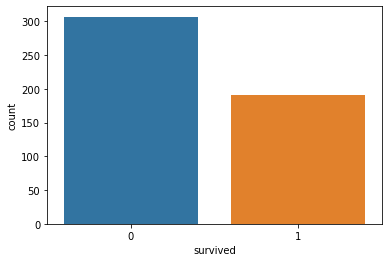


PCLASS
3    269
1    117
2    112
Name: pclass, dtype: int64
3    0.540161
1    0.234940
2    0.224900
Name: pclass, dtype: float64


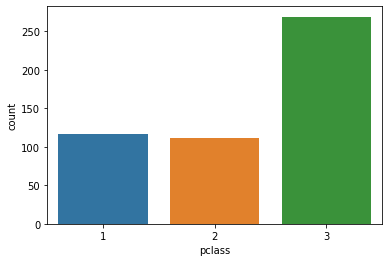


SEX
male      323
female    175
Name: sex, dtype: int64
male      0.648594
female    0.351406
Name: sex, dtype: float64


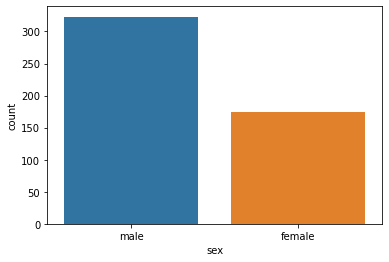


EMBARK_TOWN
Southampton    355
Cherbourg      102
Queenstown      41
Name: embark_town, dtype: int64
Southampton    0.712851
Cherbourg      0.204819
Queenstown     0.082329
Name: embark_town, dtype: float64


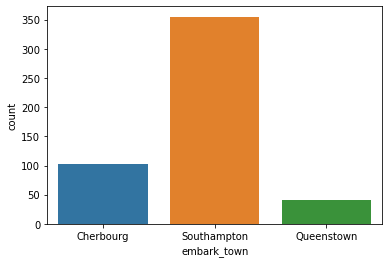


ALONE
1    315
0    183
Name: alone, dtype: int64
1    0.63253
0    0.36747
Name: alone, dtype: float64


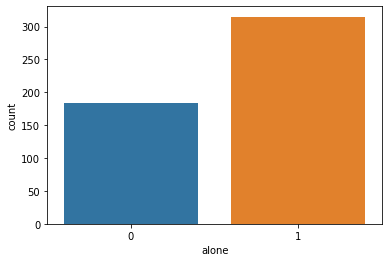

In [10]:
for col in col_cat:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True))
    sns.countplot(x=col, data=train)
    plt.show()
    print()

Takeaways
- there are no noteable issues
- these do appear to be categorical variables
- survived
    - target variable
    - more people died than survived
        - 61% did not survive
- pclass
    - over half of the passengers are 3rd class
    - 1st and 2nd class have about the same number of passengers
- sex
    - about 65% of the passengers are male
- embark_town
    - most of the passengers boarded from Southampton
- alone
    - 63% of passengers were traveling alone

#### numeric variables

AGE
29.678105    97
28.000000    19
18.000000    17
24.000000    17
25.000000    16
             ..
0.830000      1
64.000000     1
59.000000     1
36.500000     1
34.500000     1
Name: age, Length: 80, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


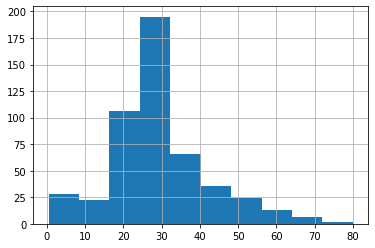

SIBSP
0    357
1     96
2     21
3      9
4      8
8      5
5      2
Name: sibsp, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


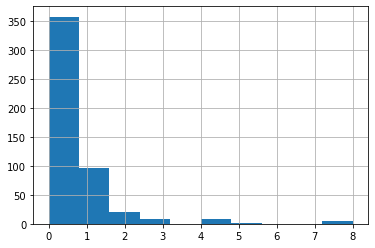

PARCH
0    385
1     65
2     40
3      4
5      3
4      1
Name: parch, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


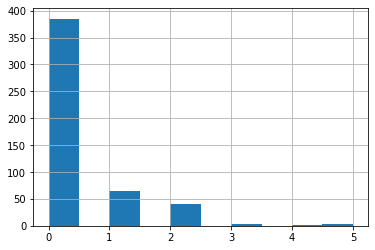

FARE
13.0000     27
8.0500      24
7.8958      23
7.7500      20
26.0000     17
            ..
7.8875       1
6.4958       1
9.3500       1
14.4000      1
512.3292     1
Name: fare, Length: 189, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


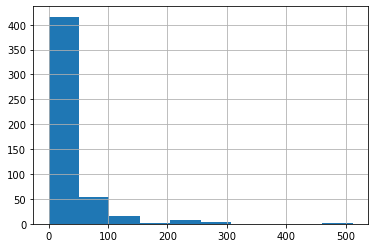

In [11]:
for col in col_num:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].hist())
    plt.show()

Takeaways
- fare is not a normal distribution 
    - in the future, we could bin higher values, and see if it is normally distributed
- sibsp and parch has some outliers
- sibsp and parch also seem to be discrete values, so we may want to treat them as such

### Bivariate Stats
-USE TRAIN DATASET ONLY-

1. Hypothesize
2. Visualize
3. Analyze (with statistics)
4. Summarize

In [12]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


#### 1. Hypothesize

Q: does pclass affect whether or not someone survived?

what type of variables am i comparing?
- pclass: categorical
- survived: categorical 

#### 2. Visualize

what type of plot can i use for this?
- barplot

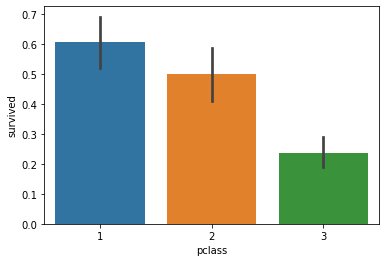

In [13]:
sns.barplot(data=train, x='pclass', y='survived')
plt.show()

#### 3. Analyze (with stats)

what type of stats test should i use for this?
- chi^2


$H_0$: pclass is independent of survived

$H_a$: pclass is dependent on survived

alpha = 0.05

In [14]:
#only using my train dataset
observed = pd.crosstab(train.pclass, train.survived)
observed

survived,0,1
pclass,,
1,46,71
2,56,56
3,205,64


In [15]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [16]:
p

1.018577101089497e-12

The p-value is less than alpha, therefore, we reject the null hypothesis

#### 4. Summarize

There IS a relationship between the passenger class (pclass) and whether or not they survived. 

### Repeat

In [17]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


#### 1. Hypothesize

Q: does fare incidate whether or not someone survived? 

what type of variables am i comparing?
- fare is continuous
- survived is categorical

#### 2. Visualize

what kind of plot can i use? 
- boxplot
- swarmplot
- violinplot
- stripplot 

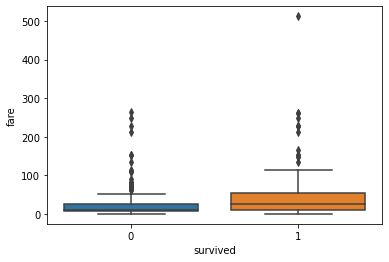

In [18]:
# plt.figure(figsize=(12,6))
sns.boxplot(data=train, x='survived', y='fare')
plt.show()

<AxesSubplot:xlabel='survived', ylabel='fare'>

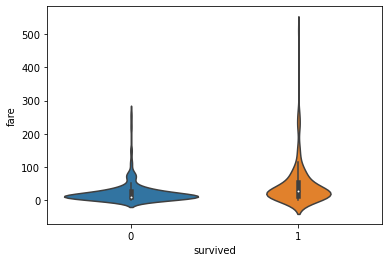

In [19]:
#better shows the density
sns.violinplot(data=train, x='survived', y='fare')

Our categorical variable should be on our x-axis, since our x-axis is our unique violin or unique box, and we need to be able to see each unique value

#### 3. Analyze (with statistics)

what type of test should i use for this?
- ttest


is my continuous value normally distributed?
- no, so this means we cant use ttest


am i comparing subpopulations to each other or a subpopulation to an overall population?
- we are comparing subpopulations to each other

A: mann-whitney



$H_0$: the mean of fare for people who survived and who didn't survive is the same

$H_a$: the mean of fare for people who survived and who didn't survive is different

alpha = 0.05

In [20]:
surv_no_fare = train [train.survived == 0].fare

surv_yes_fare = train [train.survived == 1].fare

In [22]:
t, p = stats.mannwhitneyu(surv_no_fare, surv_yes_fare)
t, p

(18893.0, 2.4211056747949507e-11)

In [24]:
titanic_df.shape

(891, 13)

We reject the null hypothesis

#### 4. Summarize

There is a difference in the fare for people who did survive and people who didn't survive

### Multivariate Stats
-USE TRAIN DATASET ONLY-

- can ask more targeted questions, like subgroup vs subgroup vs catergory
- multivariate statistical tests exist, but are outside the scope of this course.

1. Hypothesize
2. Visualize
3. ~Analyze (with statistics)~
4. Summarize


In [25]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


#### 1. Hypothesize

Q: do males have a greater chance of survival when traveling alone?

- sex: categorical
- alone: categorical
- survive: categorical

#### 2. Visualize

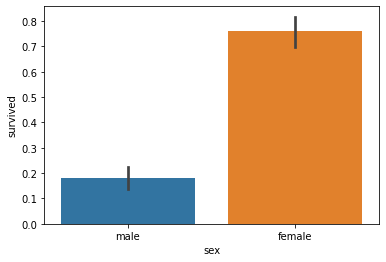

In [26]:
#just two variables
sns.barplot(data=train, x='sex', y='survived')
plt.show()

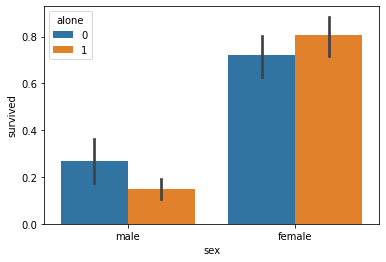

In [27]:
#using hue to show the third variable
sns.barplot(data=train, x='sex', y='survived', hue='alone')
plt.show()

#### 3. Summarize

- females are more likely to survive
- looks like men traveling alone survive less than men not traveling alone

## Explore Conclusions
note: this is a summary of all of our takeaways in the explore section

- passenger class affected survival rates
- fare also affected survival rates
- males survived way less than females, and were least likely to survive when traveling alone


### Final notes on exploring

How much time do you think it will take to explore all of your features and how they relate to your target variable? 
- a lot of time

Therefore, you have to PRIORITIZE the features you want to compare
- use your domain knowledge
- you can also rotate your relationships with a for loop (at the beginning of explore)
    - maybe look at a pairplot


### With more time, reiterate
As you have more time, you can reiterate and go back through and investigate more features. 

Recall how we dropped the age column completetly since 20% of the values were missing? 
- add back that column 
    - maybe drop all the rows with nulls instead
    - maybe try to replace those null values with some other value, maybe by group?
- investigate how age affects survival now

### Make sure you're documenting takeaways throughout your exploration! 